In [40]:
import numpy as np
import pandas as pd
import json

In [41]:
# data_path = "/home/petigep/college/orak/digikep2/GOLD_TEST/great_cnn_pixels_76_res.csv"
# data_path = "/home/petigep/college/orak/digikep2/logo/eval_dataset/great_cnn_pixels_76_res_real_life_images.csv"
data_path = "/home/petigep/college/orak/digikep2/logo/eval_dataset/great_cnn48x4_pixels_74_res_real_life_images.csv"

In [42]:
df = pd.read_csv(data_path)

In [43]:
prediction_label = list()

for item in df["PREDICTION"]:
    item = item[1:-1]
    float_list= [float(x) for x in item.split(", ")]
    prediction_label.append(np.argmax(float_list))

h = """{'0': 'adidas',
 '1': 'apple',
 '2': 'cocacola',
 '3': 'disney',
 '4': 'nike',
 '5': 'nologo',
 '6': 'puma'}"""

json_acceptable_string = h.replace("'", "\"")
id2label = json.loads(json_acceptable_string)
id2label = {int(k): v for k,v in id2label.items()}
prediction_label_text = [id2label[x] for x in prediction_label]

In [44]:
df["PREDICTION_LABEL_TEXT"] = prediction_label_text
df["PREDICTION_LABEL_ID"] = prediction_label
df.to_csv("/home/petigep/college/orak/digikep2/logo/eval_dataset/trash/great_cnn_pixels_76_res_real_life_images_extended.csv", index=False)

In [45]:
# df["PREDICTION_LABEL_TEXT"] = prediction_label_text
# df["PREDICTION_LABEL_ID"] = prediction_label
# df.to_csv("/home/petigep/college/orak/digikep2/GOLD_TEST/great_cnn_pixels_76_res_extended.csv", index=False)

### Innen jön a data science

In [46]:
# data_path2 = "/home/petigep/college/orak/digikep2/GOLD_TEST/great_cnn_pixels_76_res_extended.csv"
# outfile = "/home/petigep/college/orak/digikep2/GOLD_TEST/great_cnn_pixels_76_by_class.csv"
# df = pd.read_csv(data_path2)

In [47]:
data_path2 = "/home/petigep/college/orak/digikep2/logo/eval_dataset/trash/great_cnn_pixels_76_res_real_life_images_extended.csv"
outfile = "/home/petigep/college/orak/digikep2/logo/eval_dataset/trash/great_cnn_pixels_76_res_real_life_images_by_class.csv"
df = pd.read_csv(data_path2)

In [48]:
def accuracy_by_class(y, pred):
    class_good = dict()
    class_bad = dict()
    
    for a, b in zip(y, pred):
        if a not in class_good:
            class_good[a] = 0
            
        if a not in class_bad:
            class_bad[a] = 0
        if a == b:
            class_good[a] += 1
        else:
            class_bad[a] += 1
    
    return class_good, class_bad
    

In [49]:
differency = dict()
good, bad = accuracy_by_class(df["LABEL"], df["PREDICTION_LABEL_TEXT"])

for key, value in good.items():
    differency[key] = value / (value + bad[key])

with open (outfile, "w") as out_f:
    for key, value in differency.items():
        out_f.write("{}, {}\r\n".format(key, value))
    
# res = pd.DataFrame.from_dict(differency, orient='index')
# res.to_csv(outfile, index=False)



In [50]:
differency

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}

In [51]:
labels = list()
accuracy = list()

for key, value in differency.items():
    labels.append(key)
    accuracy.append(value)

plotting_df = pd.DataFrame({"LABELS": labels, "ACCURACY": accuracy})
plotting_df

,LABELS,ACCURACY
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0


In [52]:
plotting_df.to_csv("/home/petigep/college/orak/digikep2/kotprog_prezentation/results/second_good_model.csv")

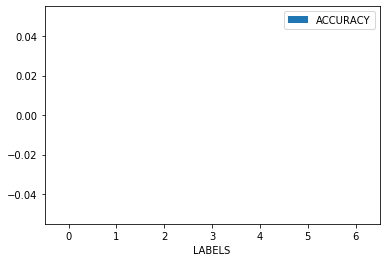

In [54]:
ax = plotting_df.plot.bar(x='LABELS', y='ACCURACY', rot=0)

In [24]:
fig = ax.get_figure()
fig.savefig("/home/petigep/college/orak/digikep2/kotprog_prezentation/results/second_good_model.png")

In [21]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_